In [1]:
#Email Spam Fiter Using a Naive Bayes Classifier

In [2]:
#import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [3]:
def evaluate_confusion_matrix(true_negative, false_positive, false_negative, true_positive):
    
    #sensitivity of traning model
    sensitivity = true_positive / (true_positive + false_negative)
    
    #specificity of training model
    specificity = true_negative / (true_negative + false_positive)
    
    #false negative rate of training model
    total_negative = true_negative + false_positive
    false_positive_rate = false_positive / total_negative
    
    #false positive rate of training model
    total_positive = false_negative + true_positive
    false_negative_rate = false_negative / total_positive
    
    #error rate of training model (ratio of total incorrect predictions)
    error_rate = (false_negative + false_positive) / (total_negative + total_positive)

    #accuracy of training model
    accuracy = (true_negative + true_positive) /  (total_negative + total_positive)

    return accuracy, sensitivity, specificity, false_negative_rate, false_positive_rate, error_rate, total_negative, total_positive

In [4]:
#import data
spam_df = pd.read_csv('./spam.csv')

#view data
spam_df.head(3)

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...

In [5]:
#view counts of each category
spam_df.groupby('Category').describe()

Message                                                             
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later  \
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
#create a new column called 'spam' and assign a numeric label to the 'Category' column (vectorisation)
spam_df['spam'] = spam_df['Category'].apply(lambda x : 1 if x == 'spam' else 0)

#view data
spam_df.head(3)

Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1

In [7]:
#run train test split function
#x = features (text of each email); y = target (spam = 1, ham = 0)
train_x, test_x, train_y, test_y = train_test_split(spam_df['Message'], spam_df['spam'], test_size = 0.25)

In [8]:
#initialise an instance of the CountVectorizer class
#cv turns text into a word count of unique words
cv = CountVectorizer()

#create an instance of the MultinomialNB class
model = MultinomialNB()

In [9]:
#EVALUATE THE TRAINING SET

#use the fit method to build a mapping from the distinct set words in each email to an integer
cv.fit(train_x)

#use the transform method to count each distinct word and store these as entries in a matrix
train_x_cv = cv.transform(train_x)

#fit Naive Bayes model to the training data 
model.fit(train_x_cv, train_y)

#rows contain input data; columns contain predicted data 
train_y_predictions = model.predict(train_x_cv)

#run confusion_matrix function on training data
train_confusion_matrix = confusion_matrix(train_y, train_y_predictions)

#display raw counts for each outcome
train_true_negative, train_false_positive, train_false_negative, train_true_positive = train_confusion_matrix.ravel()

print('True Negative: ', train_true_negative, 'training set ham emails were correctly predicted to be ham')
print('False Positive: ',train_false_positive, 'training set ham emails were incorrectly predicted to be spam')
print('False Negative: ',train_false_negative,  'training set spam emails were incorrectly predicted to be ham')
print('True Positive: ',train_true_positive, 'training set spam emails were correctly predicted to be spam')
print('\n')

#call the evaluate_confusion_matrix function for the training set
train_accuracy, train_sensitivity, train_specificity, train_false_negative_rate, train_false_positive_rate, train_error_rate, train_total_negative, train_total_positive \
= evaluate_confusion_matrix(train_true_negative, train_false_positive, train_false_negative, train_true_positive)

print('Accuracy of training model: ', train_accuracy)
print('Sensitivity of training model: ', train_sensitivity)
print('Specificity of training model: ', train_specificity)
print('False negative rate of training model: ', train_false_negative_rate)
print('False positive rate of training model: ', train_false_positive_rate)
print('Error rate of training model: ', train_error_rate)

True Negative:  3605 training set ham emails were correctly predicted to be ham
False Positive:  11 training set ham emails were incorrectly predicted to be spam
False Negative:  20 training set spam emails were incorrectly predicted to be ham
True Positive:  543 training set spam emails were correctly predicted to be spam


Accuracy of training model:  0.992581957406078
Sensitivity of training model:  0.9644760213143873
Specificity of training model:  0.9969579646017699
False negative rate of training model:  0.035523978685612786
False positive rate of training model:  0.0030420353982300885
Error rate of training model:  0.007418042593921991


In [10]:
#EVALUATE THE TEST SET

#use the transform method to count each distinct word and store these as entries in a matrix
test_x_cv = cv.transform(test_x)

#rows contain input data; columns contain predicted data 
test_y_predictions = model.predict(test_x_cv)

#run confusion_matrix function on test data
test_confusion_matrix = confusion_matrix(test_y, test_y_predictions)

#display raw counts for each outcome
test_true_negative, test_false_positive, test_false_negative, test_true_positive = test_confusion_matrix.ravel()

print('True Negative: ', test_true_negative, 'test set ham emails were correctly predicted to be ham')
print('False Positive: ', test_false_positive, 'test set ham emails were incorrectly predicted to be spam')
print('False Negative: ', test_false_negative,  'test set spam emails were incorrectly predicted to be ham')
print('True Positive: ', test_true_positive, 'test set spam emails were correctly predicted to be spam')
print('\n')

#call the evaluate_confusion_matrix function for the test set
test_accuracy, test_sensitivity, test_specificity, test_false_negative_rate, test_false_positive_rate, test_error_rate, test_total_negative, test_total_positive \
= evaluate_confusion_matrix(test_true_negative, test_false_positive, test_false_negative, test_true_positive)

print('Accuracy of testing model: ', test_accuracy)
print('Sensitivity of testing model: ', test_sensitivity)
print('Specificity of testing model: ', test_specificity)
print('False negative rate of testing model: ', test_false_negative_rate)
print('False positive rate of testing model: ', test_false_positive_rate)
print('Error rate of testing model: ', test_error_rate)


True Negative:  1207 test set ham emails were correctly predicted to be ham
False Positive:  2 test set ham emails were incorrectly predicted to be spam
False Negative:  14 test set spam emails were incorrectly predicted to be ham
True Positive:  170 test set spam emails were correctly predicted to be spam


Accuracy of testing model:  0.9885139985642498
Sensitivity of testing model:  0.9239130434782609
Specificity of testing model:  0.9983457402812241
False negative rate of testing model:  0.07608695652173914
False positive rate of testing model:  0.0016542597187758478
Error rate of testing model:  0.01148600143575018


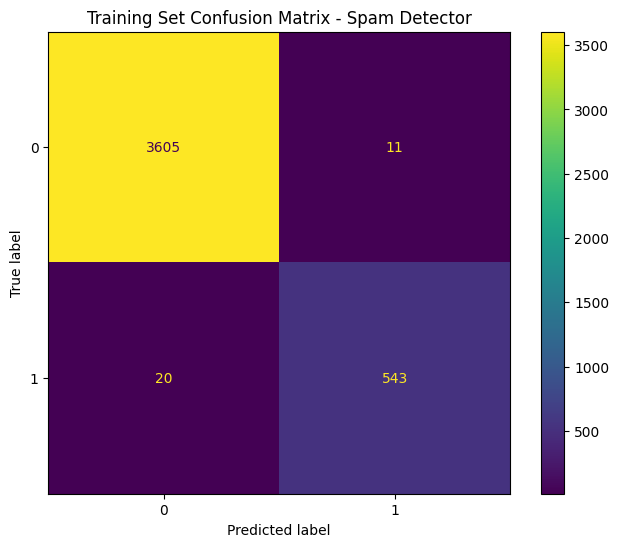

In [11]:
#TRAINING DATA CONFUSION MATRIX

#set figure size and resolution
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

#initialise using the raw 2D confusion matrix and output labels (spam = 1, ham = 0)
display = ConfusionMatrixDisplay(train_confusion_matrix, display_labels=model.classes_)

#set plot title
ax.set(title='Training Set Confusion Matrix - Spam Detector')

#plot
display.plot(ax=ax)

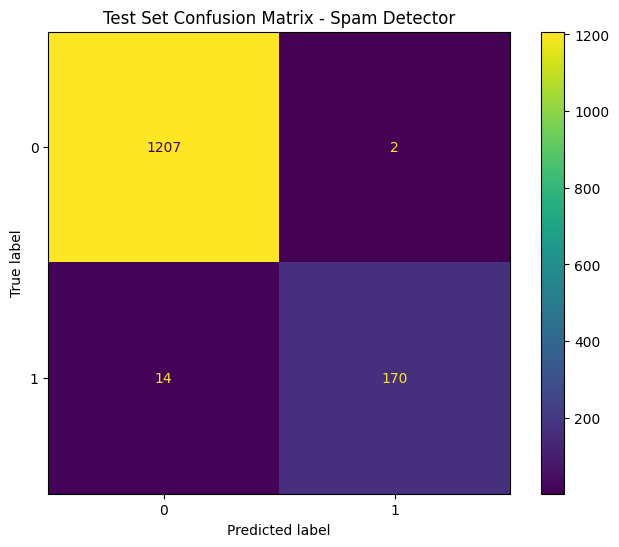

In [12]:
#TEST DATA CONFUSION MATRIX

#set figure size and resolution
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

#initialise using the raw 2D confusion matrix and output labels (spam = 1, ham = 0)
display = ConfusionMatrixDisplay(test_confusion_matrix, display_labels=model.classes_)

#set plot title
ax.set(title='Test Set Confusion Matrix - Spam Detector')

#plot
display.plot(ax=ax)